In [1]:
from glob import glob
import numpy as np
import os
import csv
import matplotlib.pyplot as plt
from tifffile import imread, imsave

# Converts tiff files to tif and rectifies the channels to be 3 channels big.

In [2]:
z_range, y_range, x_range = None, None, None
for fname in glob('*.tiff'):
    print('Processing {}'.format(fname))
    img = imread(fname)
    if not z_range:
        z_range, y_range, x_range = img.shape
    new_img = np.zeros((z_range, y_range, x_range, 3))
    max_g_val = np.amax(img)
    print('Max grey value {}'.format(max_g_val))
    for i in range(z_range):
        for j in range(y_range):
            for k in range(x_range):
                g_val = int(255*(img[i, j, k]/max_g_val))
                new_img[i, j, k, 0] = g_val
                new_img[i, j, k, 1] = g_val
                new_img[i, j, k, 2] = g_val
    new_fname = fname[:-5]+'.tif'
    print("Saving as {}\n".format(new_fname))
    imsave(new_fname, new_img.astype(np.uint8))


Processing cell_detection_0.tiff
Max grey value 52613
Saving as cell_detection_0.tif

Processing cell_detection_1.tiff
Max grey value 62075
Saving as cell_detection_1.tif

Processing cell_detection_2.tiff
Max grey value 65535
Saving as cell_detection_2.tif

Processing cell_detection_3.tiff
Max grey value 65535
Saving as cell_detection_3.tif



# Drawing centers on s3617

In [7]:
SLICE_NAME = 'cell_detection_1'
CSV_NAME = 'cell_detection_2'

img_dir = '../img/'
s3617_img = imread(img_dir+'s3617_cutout.tif')
farsight_out_dir = '../farsight_output/'
annotated_centers_dir = './../../jliu118/annotation-csv/'
annotated_dir = '../annotated_img/'
annotated_img = imread(annotated_dir+SLICE_NAME+'.tif')

In [9]:
f_centers = []
with open(farsight_out_dir+SLICE_NAME+'_centers.csv', 'r') as f:
    reader = csv.reader(f)
    headers = next(reader)
    for row in reader:
        f_centers.append(
            tuple([int(x) for x in row])
        )

a_centers = []
with open(annotated_centers_dir+SLICE_NAME+'.csv', 'r') as f:
    reader = csv.reader(f)
    headers = next(reader)
    for row in reader:
        a_centers.append(
            (int(float(row[3])), int(float(row[2])), int(float(row[1])))
        )

In [10]:
len(a_centers)
len(f_centers)

60

# Drawing farsight centers

In [13]:
z_range, y_range, x_range, _ = s3617_img.shape
for z,y,x in f_centers:
    for i in range(-3,4):
        for j in range(-3,4):
            for k in range(-3,4):
                s3617_img[min(z+i, z_range-1), min(y+j, y_range-1), min(x+k, x_range-1), 0] = 255
                s3617_img[min(z+i, z_range-1), min(y+j, y_range-1), min(x+k, x_range-1), 1] = 0
                s3617_img[min(z+i, z_range-1), min(y+j, y_range-1), min(x+k, x_range-1), 2] = 0
imsave('s3617_test_f.tif', s3617_img)

In [15]:
z_range, y_range, x_range, _ = annotated_img.shape
for z,y,x in f_centers:
    for i in range(-3,4):
        for j in range(-3,4):
            for k in range(-3,4):
                annotated_img[min(z+i, z_range-1), min(y+j, y_range-1), min(x+k, x_range-1), 0] = 255
                annotated_img[min(z+i, z_range-1), min(y+j, y_range-1), min(x+k, x_range-1), 1] = 0
                annotated_img[min(z+i, z_range-1), min(y+j, y_range-1), min(x+k, x_range-1), 2] = 0
imsave('cell_detection_test_f.tif', annotated_img)

# Drawing annotated centers

In [24]:
z_range, y_range, x_range, _ = s3617_img.shape
for z,x,y in a_centers:
    for i in range(-3,4):
        for j in range(-3,4):
            for k in range(-3,4):
                s3617_img[min(z+i, z_range-1), min(y+j, y_range-1), min(x+k, x_range-1), 0] = 255
                s3617_img[min(z+i, z_range-1), min(y+j, y_range-1), min(x+k, x_range-1), 1] = 0
                s3617_img[min(z+i, z_range-1), min(y+j, y_range-1), min(x+k, x_range-1), 2] = 0
imsave('s3617_test_a.tif', s3617_img)

In [11]:
z_range, y_range, x_range, _ = annotated_img.shape
for z,y,x in a_centers:
#     annotated_img[z, y, x, 0] = 255
#     annotated_img[z, y, x, 1] = 0
#     annotated_img[z, y, x, 2] = 0
    for i in range(-1,2):
        for j in range(-1,2):
            for k in range(-1,2):
                annotated_img[min(z+i, z_range-1), min(y+j, y_range-1), min(x+k, x_range-1), 0] = 255
                annotated_img[min(z+i, z_range-1), min(y+j, y_range-1), min(x+k, x_range-1), 1] = 0
                annotated_img[min(z+i, z_range-1), min(y+j, y_range-1), min(x+k, x_range-1), 2] = 0
imsave('cell_detection_test_a.tif', annotated_img)

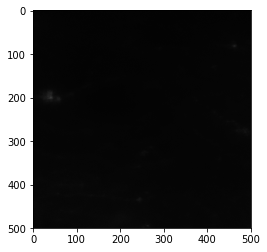

In [38]:
plt.imshow(annotated_img[46,:,:,:])
plt.show()

In [ ]:
def draw_sphere(image, coord, radius=3):
    r2 = np.arange(-radius, radius+1)**2
    dist2 = r2[:, None, None] + r2[:, None] + r2
    sphere = (dist2 <= radius**2).astype(np.uint8) * 255
    s_z, s_y, s_x = [s/2 for s in sphere.shape]
    z, y, x = coord
    chunk = image[z-s_z:z+s_z, y-s_y:y+s_y, x-s_x:x+s_x]

    chunk_z, chunk_y, chunk_x = chunk.shape
    chunk_sphere = sphere[:chunk_z, :chunk_y, :chunk_x]

    image[z-s_z:z+s_z, y-s_y:y+s_y, x-s_x:x+s_x] = chunk_sphere

    return image

img = draw_sphere(00)